In [1]:
import os
import sys


# IMPORTANT: Set these BEFORE importing torch or any ML libraries
# Disable all GPU/MPS backends to prevent crashes with IFD analyzer
os.environ["TOKENIZERS_PARALLELISM"] = "false"
os.environ["CUDA_VISIBLE_DEVICES"] = ""  # Disable CUDA
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"
os.environ["PYTORCH_MPS_HIGH_WATERMARK_RATIO"] = "0.0"  # Disable MPS memory allocation
os.environ["DISABLE_MPS_COMPAT"] = "1"  # Additional MPS disable flag
os.environ["HF_HUB_DISABLE_TELEMETRY"] = "1"  # Disable HuggingFace telemetry
os.environ["TRANSFORMERS_OFFLINE"] = "0"  # Allow model downloads

# Force CPU usage in PyTorch to avoid MPS crashes
import torch

# Forcefully disable MPS before anything else
torch.set_default_device("cpu")
if hasattr(torch.backends, "mps"):
    # Monkey-patch to prevent MPS usage
    original_is_available = torch.backends.mps.is_available
    torch.backends.mps.is_available = lambda: False
    print("MPS has been disabled - forcing CPU-only mode")
else:
    print("Using CPU for all computations")

print(f"PyTorch device: {torch.get_default_device()}")
print(f"PyTorch version: {torch.__version__}")

MPS has been disabled - forcing CPU-only mode
PyTorch device: cpu
PyTorch version: 2.6.0


In [2]:
# OUTPUT_PATH = "/Users/ryanarman/code/oumi/analysis_output/ultrachat"
OUTPUT_PATH = "/Users/ryanarman/code/oumi/analysis_output/ultrachat_2"

import os
from oumi.core.configs import AnalyzeConfig
from oumi.core.analyze.dataset_analyzer import DatasetAnalyzer

# Load config from YAML file
config = AnalyzeConfig.from_yaml(
    "/Users/ryanarman/code/oumi/configs/examples/analyze/analyze_ultrachat.yaml"
)

# Override settings for this run
# dataset_path = "/Users/ryanarman/code/scratch/ryan_hillclimbing_experiments/banking77/notebooks/data/banking77_train.jsonl"
# config.dataset_path = dataset_path
# config.dataset_name = None  # Clear dataset_name so it uses dataset_path instead
config.sample_count = 1000
config.chat_template = "chat_ml"

# Set absolute output path (makes it easier to find the results!)
config.output_path = OUTPUT_PATH

print(f"✅ Config loaded with {len(config.analyzers)} analyzers:")
for analyzer in config.analyzers:
    instance_id = analyzer.instance_id or analyzer.id
    print(f"  - {instance_id} (type: {analyzer.id})")

print(f"📁 Output will be saved to: {config.output_path}")

# Validate the configuration
config.finalize_and_validate()
print("✅ Config validated successfully!")

analyzer = DatasetAnalyzer(config)

✅ Config loaded with 19 analyzers:
  - length (type: length)
  - token_stats (type: token_stats)
  - diversity (type: diversity)
  - format (type: format)
  - quality (type: quality)
  - content_pattern (type: content_pattern)
  - embedding (type: embedding)
  - question_diversity (type: question_diversity)
  - repr_diversity (type: repr_diversity)
  - conversation_structure (type: conversation_structure)
  - response_completeness (type: response_completeness)
  - training_quality (type: training_quality)
  - task_category (type: task_category)
  - safety (type: safety)
  - difficulty (type: difficulty)
  - input_quality (type: input_quality)
  - instruct_reward (type: instruct_reward)
  - cost (type: cost)
  - helpfulness (type: llm_judge)
📁 Output will be saved to: /Users/ryanarman/code/oumi/analysis_output/ultrachat_2
✅ Config validated successfully!
[2026-01-08 16:27:28,203][oumi][rank0][pid:59456][MainThread][INFO]][base_map_dataset.py:91] Creating map dataset (type: UltrachatH4Da

In [3]:
# Run the analysis
analyzer.analyze_dataset()

# The results are stored in analyzer object
if analyzer._analysis_results:
    print(
        f"Total conversations analyzed: {analyzer._analysis_results.conversations_analyzed}"
    )

[2026-01-08 16:27:33,059][oumi][rank0][pid:59456][MainThread][INFO]][dataset_analyzer.py:363] Starting analysis of dataset: HuggingFaceH4/ultrachat_200k
[2026-01-08 16:27:33,060][oumi][rank0][pid:59456][MainThread][INFO]][dataset_analyzer.py:364] Using 19 sample analyzers: ['length', 'token_stats', 'diversity', 'format', 'quality', 'content_pattern', 'embedding', 'question_diversity', 'repr_diversity', 'conversation_structure', 'response_completeness', 'training_quality', 'task_category', 'safety', 'difficulty', 'input_quality', 'instruct_reward', 'cost', 'helpfulness']
[2026-01-08 16:27:33,061][oumi][rank0][pid:59456][MainThread][INFO]][dataset_analyzer.py:387] Analyzing 1000 of 10000 conversations
[2026-01-08 16:27:33,062][oumi][rank0][pid:59456][MainThread][INFO]][dataset_analyzer.py:439] Converting conversation dataset with 10000 items
[2026-01-08 16:27:33,063][oumi][rank0][pid:59456][MainThread][INFO]][dataset_analyzer.py:446] Limiting analysis to first 1000 items (dataset has 100

Converting HuggingFaceH4/ultrachat_200k to DataFrames: 100%|██████████| 1000/1000 [00:01<00:00, 702.82item/s]


[2026-01-08 16:27:36,335][oumi][rank0][pid:59456][MainThread][INFO]][embedding_analyzer.py:518] Computing embeddings for 1000 samples...
[2026-01-08 16:27:36,336][oumi][rank0][pid:59456][MainThread][INFO]][embedding_analyzer.py:196] Loading embedding model: all-MiniLM-L6-v2


Computing embeddings: 100%|██████████| 1000/1000 [00:06<00:00, 145.56it/s]


[2026-01-08 16:27:44,185][oumi][rank0][pid:59456][MainThread][INFO]][embedding_analyzer.py:537] Detecting semantic duplicates...
[2026-01-08 16:27:44,199][oumi][rank0][pid:59456][MainThread][INFO]][embedding_analyzer.py:624] Detecting fuzzy duplicates using MinHash LSH...
[2026-01-08 16:27:44,202][oumi][rank0][pid:59456][MainThread][INFO]][embedding_analyzer.py:350] Creating MinHash signatures for 1000 samples...


Creating MinHash signatures: 100%|██████████| 1000/1000 [00:05<00:00, 193.45it/s]


[2026-01-08 16:27:49,407][oumi][rank0][pid:59456][MainThread][INFO]][embedding_analyzer.py:369] Finding fuzzy duplicates using LSH...


Finding duplicates: 100%|██████████| 1000/1000 [00:00<00:00, 169091.07it/s]


[2026-01-08 16:27:49,417][oumi][rank0][pid:59456][MainThread][INFO]][question_diversity_analyzer.py:464] Computing embeddings for 1000 user questions...
[2026-01-08 16:27:49,417][oumi][rank0][pid:59456][MainThread][INFO]][question_diversity_analyzer.py:174] Loading embedding model: all-MiniLM-L6-v2


Computing embeddings: 100%|██████████| 1000/1000 [00:06<00:00, 144.68it/s]


[2026-01-08 16:27:57,372][oumi][rank0][pid:59456][MainThread][INFO]][question_diversity_analyzer.py:469] Clustering 1000 questions using dbscan...
[2026-01-08 16:27:57,640][oumi][rank0][pid:59456][MainThread][INFO]][question_diversity_analyzer.py:482] Found 0 clusters, 1000 unique/diverse questions (not similar to others)
[2026-01-08 16:27:57,646][oumi][rank0][pid:59456][MainThread][INFO]][repr_diversity_analyzer.py:363] Computing diversity scores for 1000 samples in column 'conversation_text_content'...
[2026-01-08 16:27:57,648][oumi][rank0][pid:59456][MainThread][INFO]][repr_diversity_analyzer.py:165] Loading embedding model: sentence-transformers/all-MiniLM-L6-v2


Computing embeddings: 100%|██████████| 1000/1000 [00:06<00:00, 143.19it/s]


[2026-01-08 16:28:05,585][oumi][rank0][pid:59456][MainThread][INFO]][repr_diversity_analyzer.py:230] Computing nearest neighbor distances for 1000 samples (k=5)...
[2026-01-08 16:28:05,616][oumi][rank0][pid:59456][MainThread][INFO]][repr_diversity_analyzer.py:556] Column 'conversation_text_content': 7/1000 samples (0.7%) are redundant
[2026-01-08 16:28:14,877][oumi][rank0][pid:59456][MainThread][INFO]][llm_judge_analyzer.py:444] Initialized LLM Judge with model: gpt-4o-mini, engine: openai


 44%|████▎     | 435/1000 [00:08<00:05, 104.19it/s]

[2026-01-08 16:28:23,020][oumi][rank0][pid:59456][ThreadPoolExecutor-13_0][WARNING]][adaptive_concurrency_controller.py:237] Entering warmup state, but concurrency is already at maximum value. Consider raising the max concurrency.


100%|██████████| 1000/1000 [00:13<00:00, 71.58it/s]


[2026-01-08 16:28:30,974][oumi][rank0][pid:59456][MainThread][INFO]][embedding_analyzer.py:518] Computing embeddings for 6208 samples...


Computing embeddings: 100%|██████████| 6208/6208 [02:31<00:00, 41.04it/s] 


[2026-01-08 16:31:02,236][oumi][rank0][pid:59456][MainThread][INFO]][embedding_analyzer.py:537] Detecting semantic duplicates...
[2026-01-08 16:31:02,358][oumi][rank0][pid:59456][MainThread][INFO]][embedding_analyzer.py:624] Detecting fuzzy duplicates using MinHash LSH...
[2026-01-08 16:31:02,360][oumi][rank0][pid:59456][MainThread][INFO]][embedding_analyzer.py:350] Creating MinHash signatures for 6208 samples...


Creating MinHash signatures: 100%|██████████| 6208/6208 [00:10<00:00, 568.99it/s]


[2026-01-08 16:31:13,325][oumi][rank0][pid:59456][MainThread][INFO]][embedding_analyzer.py:369] Finding fuzzy duplicates using LSH...


Finding duplicates: 100%|██████████| 6208/6208 [00:00<00:00, 161066.92it/s]


[2026-01-08 16:31:13,380][oumi][rank0][pid:59456][MainThread][INFO]][question_diversity_analyzer.py:464] Computing embeddings for 3104 user questions...


Computing embeddings: 100%|██████████| 3104/3104 [00:14<00:00, 208.59it/s]


[2026-01-08 16:31:28,266][oumi][rank0][pid:59456][MainThread][INFO]][question_diversity_analyzer.py:469] Clustering 3104 questions using dbscan...
[2026-01-08 16:31:28,289][oumi][rank0][pid:59456][MainThread][INFO]][question_diversity_analyzer.py:482] Found 0 clusters, 3104 unique/diverse questions (not similar to others)
[2026-01-08 16:31:28,295][oumi][rank0][pid:59456][MainThread][INFO]][repr_diversity_analyzer.py:363] Computing diversity scores for 6208 samples in column 'text_content'...


Computing embeddings: 100%|██████████| 6208/6208 [00:32<00:00, 192.87it/s]


[2026-01-08 16:32:00,487][oumi][rank0][pid:59456][MainThread][INFO]][repr_diversity_analyzer.py:230] Computing nearest neighbor distances for 6208 samples (k=5)...
[2026-01-08 16:32:01,186][oumi][rank0][pid:59456][MainThread][INFO]][repr_diversity_analyzer.py:556] Column 'text_content': 1229/6208 samples (19.8%) are redundant
[2026-01-08 16:32:05,815][oumi][rank0][pid:59456][MainThread][INFO]][llm_judge_analyzer.py:780] Skipping message-level analysis (analyze_message_level=False). Set analyze_message_level=True to enable.
Total conversations analyzed: 1000


In [4]:
from pathlib import Path
import traceback
from oumi.utils.analysis_utils import save_analyzer_artifacts

# Save all analyzer artifacts (dataframes, schemas, summary)
save_analyzer_artifacts(analyzer, Path(config.output_path), output_format="parquet")


[2026-01-08 16:32:06,318][oumi.utils.analysis_utils][rank0][pid:59456][MainThread][INFO]][analysis_utils.py:1414] Saved message analysis to: /Users/ryanarman/code/oumi/analysis_output/ultrachat_2/messages_df.parquet
[2026-01-08 16:32:06,337][oumi.utils.analysis_utils][rank0][pid:59456][MainThread][INFO]][analysis_utils.py:1420] Saved conversation analysis to: /Users/ryanarman/code/oumi/analysis_output/ultrachat_2/conversations_df.parquet
[2026-01-08 16:32:06,394][oumi.utils.analysis_utils][rank0][pid:59456][MainThread][INFO]][analysis_utils.py:1426] Saved merged analysis to: /Users/ryanarman/code/oumi/analysis_output/ultrachat_2/merged_df.parquet
[2026-01-08 16:32:06,395][oumi.utils.analysis_utils][rank0][pid:59456][MainThread][INFO]][analysis_utils.py:1438] Saved message schema to: /Users/ryanarman/code/oumi/analysis_output/ultrachat_2/message_schema.json
[2026-01-08 16:32:06,396][oumi.utils.analysis_utils][rank0][pid:59456][MainThread][INFO]][analysis_utils.py:1445] Saved conversatio

# Load artifacts

In [5]:
# OUTPUT_PATH = "/Users/ryanarman/code/oumi/analysis_output/ultrachat"
OUTPUT_PATH = "/Users/ryanarman/code/oumi/analysis_output/ultrachat_2"

from oumi.utils.analysis_utils import (
    load_analyzer_artifacts,
    regenerate_recommendations,
)

artifacts = load_analyzer_artifacts(OUTPUT_PATH)

# Regenerate recommendations with latest code (e.g., updated duplicate detection)
artifacts = regenerate_recommendations(artifacts, outlier_threshold=3.0)

artifacts.keys()

# Generate HTML report if configured


try:
    from oumi.core.analyze.report_generator import HTMLReportGenerator

    report_gen = HTMLReportGenerator()
    report_path = report_gen.generate_report(
        artifacts=artifacts,
        output_path=OUTPUT_PATH,
        title="Ultrachat Analysis Report",
    )
    print(f"✅ Generated HTML report at: {report_path / 'index.html'}")
except ImportError:
    print("⚠️  Plotly not installed. Skipping HTML report generation.")
    print("   Install with: pip install 'oumi[analyze_advanced]'")
except Exception as e:
    print(f"⚠️  Failed to generate HTML report: {e}")
    print("\n🔍 FULL TRACEBACK:")
    print("=" * 70)
    traceback.print_exc()
    print("=" * 70)

print(f"\n📁 All results saved to: {OUTPUT_PATH}")


[2026-01-08 16:32:06,420][oumi.utils.analysis_utils][rank0][pid:59456][MainThread][INFO]][analysis_utils.py:1539] Loaded message analysis from: /Users/ryanarman/code/oumi/analysis_output/ultrachat_2/messages_df


[2026-01-08 16:32:06,430][oumi.utils.analysis_utils][rank0][pid:59456][MainThread][INFO]][analysis_utils.py:1546] Loaded conversation analysis from: /Users/ryanarman/code/oumi/analysis_output/ultrachat_2/conversations_df
[2026-01-08 16:32:06,454][oumi.utils.analysis_utils][rank0][pid:59456][MainThread][INFO]][analysis_utils.py:1553] Loaded merged analysis from: /Users/ryanarman/code/oumi/analysis_output/ultrachat_2/merged_df
[2026-01-08 16:32:06,456][oumi.utils.analysis_utils][rank0][pid:59456][MainThread][INFO]][analysis_utils.py:1562] Loaded combined schemas from: /Users/ryanarman/code/oumi/analysis_output/ultrachat_2/schema.json
[2026-01-08 16:32:06,457][oumi.utils.analysis_utils][rank0][pid:59456][MainThread][INFO]][analysis_utils.py:1584] Loaded analysis summary from: /Users/ryanarman/code/oumi/analysis_output/ultrachat_2/analysis_summary.json
[2026-01-08 16:32:06,458][oumi.utils.analysis_utils][rank0][pid:59456][MainThread][INFO]][analysis_utils.py:1586] Loaded analyzer artifacts

In [4]:
schema = analyzer.get_schema()
print(f"len(schema): {len(schema)}")
merged_columns = analyzer.analysis_df.columns
print(f"len(merged_columns): {len(merged_columns)}")

NameError: name 'analyzer' is not defined

In [ ]:
analyzer_names = [a.instance_id for a in config.analyzers]
analyzer_names

['length',
 'diversity',
 'format',
 'quality',
 'content_pattern',
 'embedding',
 'question_diversity',
 'repr_diversity',
 'conversation_structure',
 'response_completeness',
 'training_quality',
 'task_category',
 'safety',
 'difficulty',
 'input_quality',
 'instruct_reward',
 'cost',
 'helpfulness',
 'instruction_quality',
 'response_quality',
 'excessive_politeness',
 'roleplay_bleeding',
 'reasoning_leakage',
 'style_homogenization',
 'repetitive_turns']

# Conv level

In [58]:
conv_df = artifacts["conversations_df"]
msg_df = artifacts["messages_df"]

In [7]:
# conv_df = analyzer.conversation_df
# conv_df.head()

<Axes: >

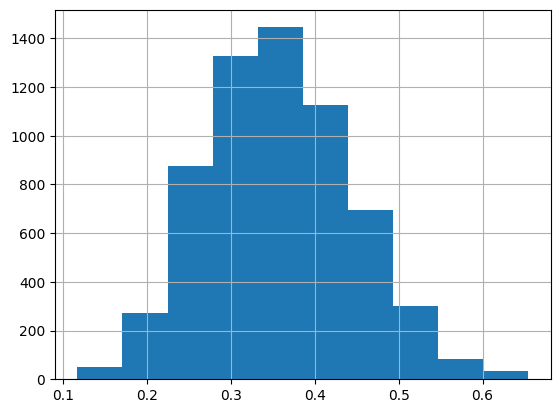

In [65]:
analyzer_id = "repr_diversity"
score_col = f"text_content__{analyzer_id}__score"
reason_col = f"text_content__{analyzer_id}__reasoning"

msg_df[score_col].hist()

In [64]:
print(msg_df[msg_df[score_col] < 0.15].text_content.iloc[0])
print()
# print(msg_df[msg_df[score_col] < 6.5][reason_col].iloc[0])


Sure, I'll add some more information about the strategies we will be discussing. Here's an updated agenda:

Agenda

Marketing Team Meeting for New Campaign Implementation

I. Introduction and welcome
- Introduce team members
- Briefly discuss the purpose of the meeting

II. Goals of the Marketing Campaign
- Review the goals of the campaign
- Discuss areas of success from past campaigns
- Outline areas of improvement or opportunity

III. Target Audience
- Define the target audience for the campaign
- Discuss demographics and psychographics of the target audience
- Review communication channels for the target audience

IV. Budget
- Review and finalize the budget for the campaign
- Discuss any changes or updates needed for the budget
- Outline how the budget will be allocated across various channels

V. Strategies
- Brainstorm multiple strategies to achieve campaign goals within the budget
- Consider various marketing channels and tactics such as email marketing, social media marketing, s

<Axes: >

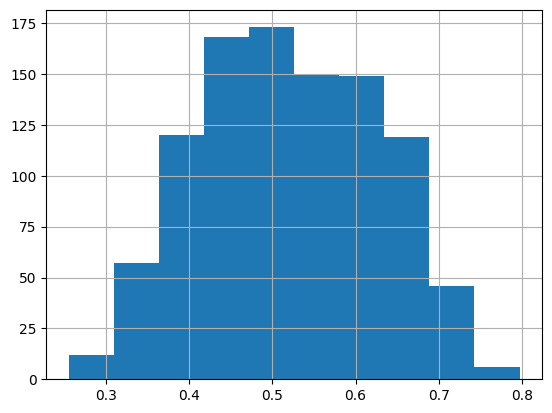

In [66]:
analyzer_id = "repr_diversity"
score_col = f"conversation_text_content__{analyzer_id}__score"
reason_col = f"conversation_text_content__{analyzer_id}__reasoning"

conv_df[score_col].hist()

In [73]:
print(conv_df[conv_df[score_col] > 0.75].conversation_text_content.iloc[2])
print()
# print(conv_df[conv_df[score_col] < 8.5][reason_col].iloc[0])

<|im_start|>user
On August 5 2008, Madonna’s Give It 2 Me was released as an eight track CD maxi-single by Warner Bros. Records in the U.S. It included amazing club remixes by Eddie Amador, Paul Oakenfold, Fedde Le Grand, Tong & Spoon, Jody den Broeder, and a ragga mix by Sly & Robbie.
The single was also issued in the U.S. As a double-vinyl 12-inch set, a 12-inch vinyl picture disc and as a double-vinyl 7-inch set coupled with her previous single, 4 Minutes. Though no Canadian pressings of the single were issued, the U.S. CD maxi-single was distributed to Canadian retailers with a Warner Music Canada special import sticker.
Give It 2 Me was the second single from Hard Candy. It was written by Madonna & Pharrell Williams with production by Madonna & The Neptunes.
On May 12 2008, Madonna’s Hard Candy album was released in the UK in a Limited Collector’s Edition Candy Box.
The Candy Box included a 14-track edition of the hit album (containing the standard version of the album and two bon

In [ ]:
from oumi.core.analyze.column_utils import (
    filter_analyzer_columns,
    get_analyzer_columns_by_analyzer,
    parse_analyzer_column_name,
)

conv_columns = analyzer.conversation_df.columns
row = analyzer.conversation_df.iloc[0]

# Choose the analzyer to analyze
analyzer_name = analyzer_names[0]


filtered_cols = filter_analyzer_columns(conv_columns, analyzer_id=analyzer_name)
if filtered_cols:
    print(f"Analyzer: {analyzer_name}")
    info = parse_analyzer_column_name(filtered_cols[0])
    # print("\nInput:")
    # print(f"source_column: {info.source_column}")
    # print(f"{row[info.source_column]}\n")

    for col in filtered_cols:
        info = parse_analyzer_column_name(col)
        print(f"metric: {info.metric_name}")
        # print(f"type: {schema[col]['type']}")
        # print(f"content_type: {schema[col]['content_type']}")
        print(f"description: {schema[col]['description']}")
        print(f"value: {row[col]}")
        print("\n")
else:
    print(f"No columns found for analyzer: {analyzer_name}")


Analyzer: length
metric: token_count
description: Token count for conversation_text_content
value: 729




# Message level

In [15]:
msg_df = analyzer.message_df
msg_df.head()

,conversation_index,conversation_id,message_index,message_id,role,text_content,text_content__length__token_count,text_content__diversity__unique_words_ratio,text_content__format__has_markdown,text_content__format__has_json,...,text_content__response_quality__reasoning,text_content__response_quality__raw_response,text_content__excessive_politeness__score,text_content__excessive_politeness__label,text_content__excessive_politeness__reasoning,text_content__excessive_politeness__raw_response,text_content__reasoning_leakage__score,text_content__reasoning_leakage__label,text_content__reasoning_leakage__reasoning,text_content__reasoning_leakage__raw_response
0,0,0,0,msg_0,user,These instructions apply to section-based them...,124,0.739130,False,False,...,None,None,NaN,None,None,None,NaN,None,None,None
1,0,0,1,msg_1,assistant,This feature only applies to Collection pages ...,22,0.950000,False,False,...,The response is somewhat relevant but lacks co...,"```json\n{\n ""score"": 6,\n ""label"": ""needs_i...",2.0,minimal,"The response is direct and factual, with no si...","```json\n{\n ""score"": 2,\n ""label"": ""minimal...",2.0,minimal,The response is mostly direct and provides a c...,"```json\n{\n ""score"": 2,\n ""label"": ""minimal..."
2,0,0,2,msg_2,user,Can you guide me through the process of enabli...,23,0.954545,False,False,...,None,None,NaN,None,None,None,NaN,None,None,None
3,0,0,3,msg_3,assistant,"Sure, here are the steps to enable the seconda...",184,0.640000,True,False,...,"The response is helpful and relevant, providin...","```json\n{\n ""score"": 9,\n ""label"": ""good"",\...",2.0,minimal,The response is direct and provides clear step...,"```json\n{\n ""score"": 2,\n ""label"": ""minimal...",5.0,moderate,The response provides a detailed step-by-step ...,"```json\n{\n ""score"": 5,\n ""label"": ""moderat..."
4,0,0,4,msg_4,user,Can you provide me with a link to the document...,14,1.000000,False,False,...,None,None,NaN,None,None,None,NaN,None,None,None


In [1]:
msg_df[msg_df.role == "assistant"].text_content__response_quality__score.head()

NameError: name 'msg_df' is not defined

In [17]:
msg_df[msg_df.role == "system"].text_content__instruction_quality__score.iloc[0]


IndexError: single positional indexer is out-of-bounds

In [ ]:
msg_df[msg_df.role == "system"].text_content__instruction_quality__label.iloc[0]


'good'

In [ ]:
msg_df[msg_df.role == "system"].text_content__instruction_quality__reasoning.iloc[0]


'The instruction is clear and specific, with a defined goal of classifying user queries into one of 77 banking intents. It uses action verbs and provides context through examples and intent descriptions. However, it could be improved by clarifying the range of IDs (0-76) instead of 0-77, as the highest ID listed is 76.'

In [ ]:
from oumi.core.analyze.column_utils import (
    filter_analyzer_columns,
    get_analyzer_columns_by_analyzer,
    parse_analyzer_column_name,
)

msg_columns = analyzer.message_df.columns
row = analyzer.message_df.iloc[0]

# Choose the analzyer to analyze
analyzer_name = analyzer_names[3]


filtered_cols = filter_analyzer_columns(msg_columns, analyzer_id=analyzer_name)
if filtered_cols:
    print(f"Analyzer: {analyzer_name}")
    info = parse_analyzer_column_name(filtered_cols[0])

    print("\nInput:")
    print(f"[{row['role']}]: {row[info.source_column]}\n")
    # print(f"source_column: {info.source_column}")
    print(f"{row[info.source_column]}\n")

    for col in filtered_cols:
        info = parse_analyzer_column_name(col)
        print(f"metric: {info.metric_name}")
        # print(f"type: {schema[col]['type']}")
        # print(f"content_type: {schema[col]['content_type']}")
        print(f"description: {schema[col]['description']}")
        print(f"value: {row[col]}")
        print("\n")
else:
    print(f"No columns found for analyzer: {analyzer_name}")


Analyzer: instruction_quality

Input:
[system]: You are a banking intent classifier. Classify the user's query into one of  77 banking intents (output is a single integer ID).

IDs:

0: activate_my_card
1: age_limit
2: apple_pay_or_google_pay
3: atm_support
4: automatic_top_up
5: balance_not_updated_after_bank_transfer
6: balance_not_updated_after_cheque_or_cash_deposit
7: beneficiary_not_allowed
8: cancel_transfer
9: card_about_to_expire
10: card_acceptance
11: card_arrival
12: card_delivery_estimate
13: card_linking
14: card_not_working
15: card_payment_fee_charged
16: card_payment_not_recognised
17: card_payment_wrong_exchange_rate
18: card_swallowed
19: cash_withdrawal_charge
20: cash_withdrawal_not_recognised
21: change_pin
22: compromised_card
23: contactless_not_working
24: country_support
25: declined_card_payment
26: declined_cash_withdrawal
27: declined_transfer
28: direct_debit_payment_not_recognised
29: disposable_card_limits
30: edit_personal_details
31: exchange_charge
32